## pandas operations and statistics

In [131]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dates = pd.date_range('20130101', periods=6, freq='H')
df = pd.DataFrame(np.random.randint(100, size=(6,4)), index=dates, columns=list('ABCD'))

In [132]:
df.mean() # by default this is the mean of columns, which makes sense

A    38.666667
B    31.833333
C    54.500000
D    40.000000
dtype: float64

In [133]:
df.mean(1) # axis = 1 means the mean across rows. 

2013-01-01 00:00:00    47.25
2013-01-01 01:00:00    41.50
2013-01-01 02:00:00    59.25
2013-01-01 03:00:00    43.25
2013-01-01 04:00:00    25.50
2013-01-01 05:00:00    30.75
Freq: H, dtype: float64

In [134]:
#Here's a weird thing.
s = pd.Series([1,3,5,np.nan,6,8], index=dates)
s

2013-01-01 00:00:00     1
2013-01-01 01:00:00     3
2013-01-01 02:00:00     5
2013-01-01 03:00:00   NaN
2013-01-01 04:00:00     6
2013-01-01 05:00:00     8
Freq: H, dtype: float64

In [135]:
s1 = s.shift(2)
s1

2013-01-01 00:00:00   NaN
2013-01-01 01:00:00   NaN
2013-01-01 02:00:00     1
2013-01-01 03:00:00     3
2013-01-01 04:00:00     5
2013-01-01 05:00:00   NaN
Freq: H, dtype: float64

In [136]:
s.shift(2).shift(-2) # note that whenever it has to pull in missing data, it pulls in Nans.

2013-01-01 00:00:00     1
2013-01-01 01:00:00     3
2013-01-01 02:00:00     5
2013-01-01 03:00:00   NaN
2013-01-01 04:00:00   NaN
2013-01-01 05:00:00   NaN
Freq: H, dtype: float64

In [137]:
# Now what if you want to use this series as indices to select rows from the data frame? 
# You can, but the 'Nan' indexed rows get defined as Nans themselves. 
df.sub(s1, axis = 'index')

,A,B,C,D
2013-01-01 00:00:00,NaN,NaN,NaN,NaN
2013-01-01 01:00:00,NaN,NaN,NaN,NaN
2013-01-01 02:00:00,36,62,64,71
2013-01-01 03:00:00,9,21,95,36
2013-01-01 04:00:00,44,23,9,6
2013-01-01 05:00:00,NaN,NaN,NaN,NaN


# The apply function

    Applies function along input axis of DataFrame.

    The objects that 'apply' passes to functions are Series objects having the same index as
    either the DataFrame's index (axis=0) or the columns (axis=1).
    The return type from 'apply' depends on whether the passed function aggregates results.
    
    Setting the reduce argument will try to reduce the result if the DataFrame is empty.

    Parameters
    ----------
    func : function
        Function to apply to each column/row
    axis : {0 or 'index', 1 or 'columns'}, default 0
        * 0 or 'index': apply function to each column
        * 1 or 'columns': apply function to each row

In [138]:
df # look at df again

,A,B,C,D
2013-01-01 00:00:00,46,7,99,37
2013-01-01 01:00:00,17,63,46,40
2013-01-01 02:00:00,37,63,65,72
2013-01-01 03:00:00,12,24,98,39
2013-01-01 04:00:00,49,28,14,11
2013-01-01 05:00:00,71,6,5,41


In [139]:
# apply cumulative summing within the columns. 
# it makes sense that this is the default, since columns of data will have the same data type. 
df2 = df.apply(np.cumsum) 
df2

,A,B,C,D
2013-01-01 00:00:00,46,7,99,37
2013-01-01 01:00:00,63,70,145,77
2013-01-01 02:00:00,100,133,210,149
2013-01-01 03:00:00,112,157,308,188
2013-01-01 04:00:00,161,185,322,199
2013-01-01 05:00:00,232,191,327,240


In [140]:
# this lambda takes a series and returns a scalar, so it's lower by one dimension. 
# so the return type is a series. 
df3 = df.apply(lambda x: x.max() - x.min())
df3

A    59
B    57
C    94
D    61
dtype: int64

## Concatenating records together

In [141]:
# this creates a data frame with default labels (0-based indices)
dfa = pd.DataFrame(np.random.randn(10, 4))

pieces = [dfa[:3], dfa[5:6], dfa[8:]] 
dfa = pd.concat(pieces)
dfa # note reduced row indices -- there were 10 to begin with.

,0,1,2,3
0,-0.243654,0.112562,-1.639776,0.079508
1,-0.634371,1.953839,0.222370,-1.917715
2,-0.126426,-0.601316,-0.655130,1.160817
5,-1.552019,-0.701856,-1.364096,0.034347
8,-0.682345,0.250001,0.461032,-0.230795
9,-1.023404,2.954261,0.222707,0.516149


## Database-style join using pd.merge()

In [142]:
left = pd.DataFrame({'key': ['aa', 'bb'], 'lval': ['la', 'lb']})
right = pd.DataFrame({'key': ['bb', 'cc'], 'rval': ['rb', 'rc']})
left

,key,lval
0,aa,la
1,bb,lb


In [143]:
right

,key,rval
0,bb,rb
1,cc,rc


In [144]:
pd.merge(left, right) # I think this is an inner join, not an outer join.

,key,lval,rval
0,bb,lb,rb


## Group by operations

By “group by” we are referring to a process involving one or more of the following steps

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

In [145]:
dfb = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                           'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)
                   })

In [146]:
dfb

,A,B,C,D
0,foo,one,-0.886485,0.230920
1,bar,one,0.418398,-0.805344
2,foo,two,0.939130,0.243422
3,bar,three,-1.268786,-0.253152
4,foo,two,-0.400010,-1.821968
5,bar,two,-0.110012,0.141083
6,foo,one,-1.256544,-0.679587
7,foo,three,1.523957,1.051411


In [147]:
# the result of this: the function groups those records that have the same 'A' value.
# then it applies the 'sum' function to the columns in each group for which the function makes sense. 
# in this case, it only makes sense for columns C and D.
dfb.groupby('A').sum()

,C,D
A,,
bar,-0.960400,-0.917412
foo,-0.079952,-0.975801


In [148]:
# the function you apply has to be one of the functions that the GroupBy object supports. There are a lot.
dfb.groupby('A').ngroups

2

## Brief refresher on 'zip' and the '*' and '**' unpack operator things

The '*' operator is an unpack operator. It will take a list object, containing the arguments for a function, and 'unpack' the arguments out of the container. 

In [149]:
# this * isn't valid syntax unless it is inside a function call. 
ll = [['bar', 'bar', 'baz', 'baz',
                         'foo', 'foo', 'qux', 'qux'],
                        ['one', 'two', 'one', 'two',
                         'one', 'two', 'one', 'two']]

## what the * does is to unpack the inner two lists from the outer list. 
# then the zip function can take the two arguments as lists to be zipped. 

zip(*ll)

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [150]:
# the ** operator does almost the same thing for dictionaries 
# ** unpacks values out of dictionaries corresponding to the appropriate keywords,
def parrot(voltage, state='a stiff', action='voom'):
    print "-- This parrot wouldn't", action,
    print "if you put", voltage, "volts through it.",
    print "E's", state, "!"

d = {"voltage": "four million", "state": "bleedin' demised", "action": "VOOM"}
parrot(**d)


-- This parrot wouldn't VOOM if you put four million volts through it. E's bleedin' demised !


In [151]:
# now let's see what that dictionary d has to contain.
# my guess is it has to contain voltage but not state or action, since it has defaults. 
# be careful to use the two stars, since it messes up but doesn't fail if you don't. 
dd = {"voltage": "four"}
parrot(**dd)

-- This parrot wouldn't voom if you put four volts through it. E's a stiff !


In [152]:
# you can't have keywords in the directory that are unrecognized. This fails. 
dd = {"voltage": "four", "prince":"charming"}
parrot(**dd)

TypeError: parrot() got an unexpected keyword argument 'prince'

## the stack() function on data frames.

This is a lot like pivoting in Excel.

In [ ]:
tuples = zip(*ll) # creates a list of pair tuples 
tuples # note that there are 8 pairs


In [ ]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

### MultiIndex.from_tuples function: what I think each part of the return value means

- levels: a list of the levels each part of the multi-index can have
- labels: the indices of the levels in each of the multi-index dimensions 
- names: the names of the multi-index dimensions

In [ ]:
dfc = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
dfc # note how the __repr__ function treats the multi-index.

In [ ]:
stacked = dfc.stack()
stacked # what does this accomplish exactly?

In [ ]:
# I SEE! It creates a new multi-index with the inner-most column labels now treated as a level in the row index. 
print dfc.stack.__doc__

In [ ]:
# now if you unstack... the inner labels, 'second', will become part of a MultiIndex that describes the columns.
unstacked = dfc.unstack()
unstacked 

## Pivot tables!



In [ ]:
dfe = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                  'B' : ['x', 'y', 'z'] * 4,
                       'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                      'D' : np.random.randn(12),
                      'E' : np.random.randn(12)})
dfe

In [ ]:
# what does this do?
# note that if you look up the value in D for A = three, B = y, C = bar: there is nothing. 
# so the entry for that in the pivot table is Nan.
# 
pd.pivot_table(dfe, values='D', index=['A', 'B'], columns=['C'])

## Time Series

In [ ]:
# define a range of dates sampled by second.
rng = pd.date_range('1/1/2012', periods=100, freq='S')

# create a time series of the same length consisting of random integers from 0 to 500
tseries = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
tseries

In [ ]:
ts2 = tseries.resample('5S', how = 'mean')
ts2

In [ ]:
# Note: this has resampled the time series to one value every 5 original values. 
# the resampling method is the mean.
first5 = np.array([267,
432,
427,
15,
429])
first5.mean()

## Categorical data 

You can define categorical data types. 

In the example velow, you start as a raw grade which is just a letter, and coerce it to be a categorical variable. 

This, I presume, is like a factor in R.

In [ ]:
# raw grade has type, I guess, string. Redefine it as a categorical (factor) variable.
dff = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

# this is a pd.Series
dff["grade"] = dff["raw_grade"].astype("category")

# give the categories new names
# at this point, the categories are a, b, and e
# print dff["grade"].cat.categories

# rename them to these more meaningful categories
# note the total number of categories is still 3
dff["grade"].cat.categories = ["very good", "good", "very bad"]
print dff["grade"]

In [ ]:
# now 'interpolate' the current categories to a new denser set of categories
dfg = dff.copy()
dfg["grade"] = dfg["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
dfg["grade"]

In [ ]:
# now 'interpolate' the current categories to a new, completely different set of categories
# the results make no sense anymore. 
dfh = dff.copy()
dfh["grade"] = dfh["grade"].cat.set_categories(["very zoom", "bad zoom", "medium zuck", "good zuck", "very good zuck"])
dfh["grade"]

In [ ]:
# sorting is by the order of the categories (as they were defined). 
dfg.sort(columns="grade")

In [ ]:
# this is strange. In the example, the size of the missing categories was 0, which is logical. 
# here, it is NaN, which makes no sense.
dfg.groupby("grade").size()

# Plotting with Pandas!

It kind of looks as though matpoltlib plotting is built into these objects.

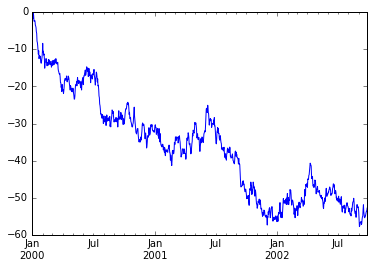

In [153]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
tss = ts.cumsum() # new time series that does partial sums of the original one, I presume
tss.plot()

## multiple curves on one plot

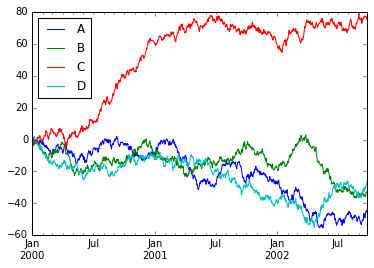

In [155]:
dfi = pd.DataFrame(np.random.randn(1000, 4), index = ts.index, columns = list('ABCD'))
dfi = dfi.cumsum()
plt.figure() # create a new figure
dfi.plot()
plt.legend(loc="best") # I like this. "Put it in the best location"

## Reading and writing data

### to csv:

df.to_csv('foo.csv')

df = pd.read_csv('foo.csv')

### to hdf5
(I guess you need to tell it what its name is when you store it)

df.to_hdf('foo.h5','df')

(Does this next piece of code create an object called df?)

pf.read_hdf('foo.h5', 'df')

### to excel

df.to_excel('foo.xlsx', sheet_name='Sheet1')

pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])